<p style=" background-color:#FF7F50;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><span  style = "padding : 50px; display : block; "><b >Raisin Dataset: Logistic Regression, KNN, and SVM Models</b></span></p>

## Notebook Overview

In this notebook, I applied classification models to the **Raisin Dataset**, which includes features such as Area, Perimeter, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, and Extent. The goal was to predict the **Class** of the raisin grain, indicating the type of raisin.

I implemented three machine learning models:

- **Logistic Regression**
- **K-Nearest Neighbors (KNN)**
- **Support Vector Machine (SVM)**

After evaluating the models based on performance metrics, I selected the most suitable model for this dataset.


## Raisin Dataset Columns

1. **Area**: Gives the number of pixels within the boundaries of the raisin grain.
2. **Perimeter**: Measures the environment by calculating the distance between the boundaries of the raisin grain and the pixels around it.
3. **MajorAxisLength**: Gives the length of the main axis, which is the longest line that can be drawn on the raisin grain.
4. **MinorAxisLength**: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin grain.
5. **Eccentricity**: Measures the eccentricity of the ellipse, which has the same moments as raisins.
6. **ConvexArea**: Gives the number of pixels of the smallest convex shell of the region formed by the raisin grain.
7. **Extent**: Gives the ratio of the region formed by the raisin grain to the total pixels in the bounding box.
8. **Class**: The class of the raisin grain, indicating the type of raisin.


# <font color='#FF7F50'> <b>Exploratory Data Analysis (EDA) and Visualization</b><font color='black'>

In [657]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf   # !pip install cufflinks

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [659]:
df = pd.read_excel("Raisin_Dataset.xlsx")  

In [660]:
df  

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [661]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [662]:
df.shape

(900, 8)

In [663]:
df.duplicated().sum()  

0

In [664]:
df.isnull().sum().any()  

False

In [665]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [666]:
df["Class"].value_counts()  

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

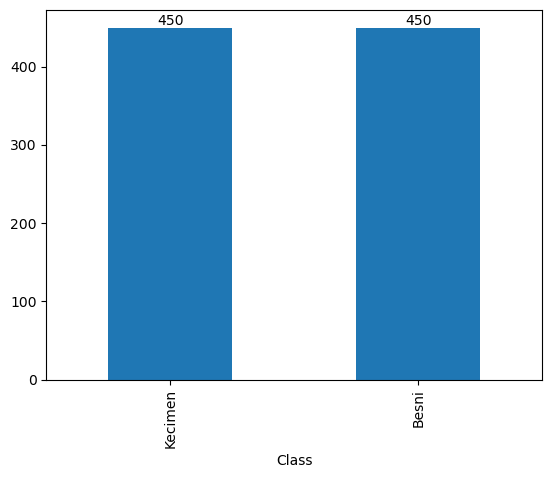

In [667]:
ax = df["Class"].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]); 

In [668]:
df["Class"] = df["Class"].map({"Kecimen":0,"Besni":1}) 

In [669]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


In [670]:
df.iloc[:,:-1].iplot(kind="box")


In [671]:
fig = px.box(df, color="Class", color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'})
fig.show()


In [672]:
df.iplot(kind="bar")  


In [673]:
fig = px.bar(df,x=df.index,y="Area",color="Class",color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'})
fig.show();

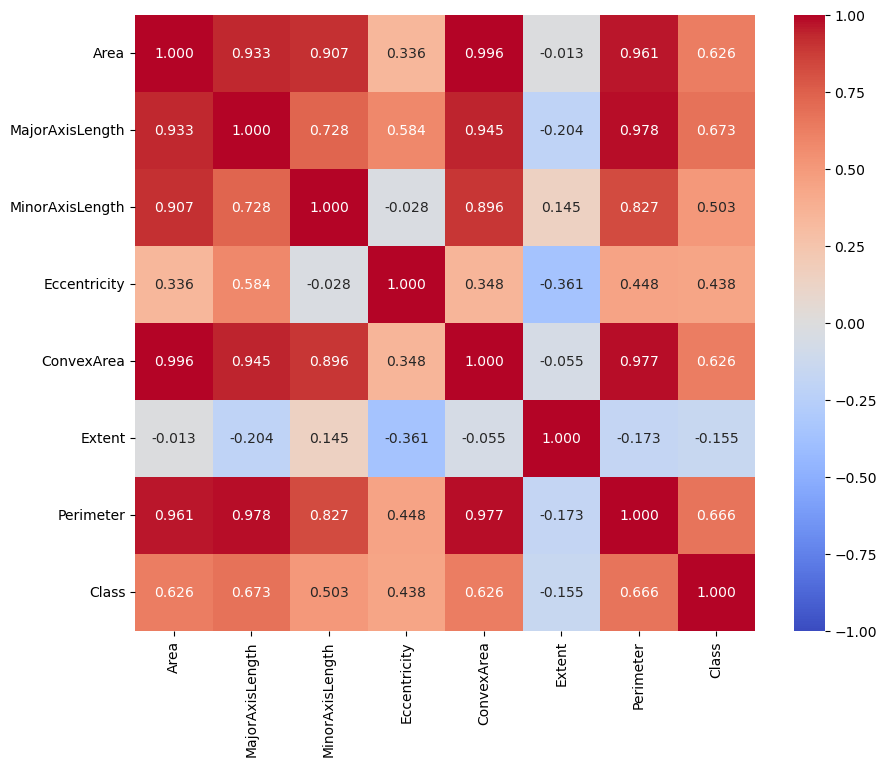

In [674]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(),vmin=-1,vmax=1, annot=True, fmt='.3f', cmap='coolwarm');


In [675]:
corr_matrix = df.corr()
fig = px.imshow(corr_matrix)
fig.show();


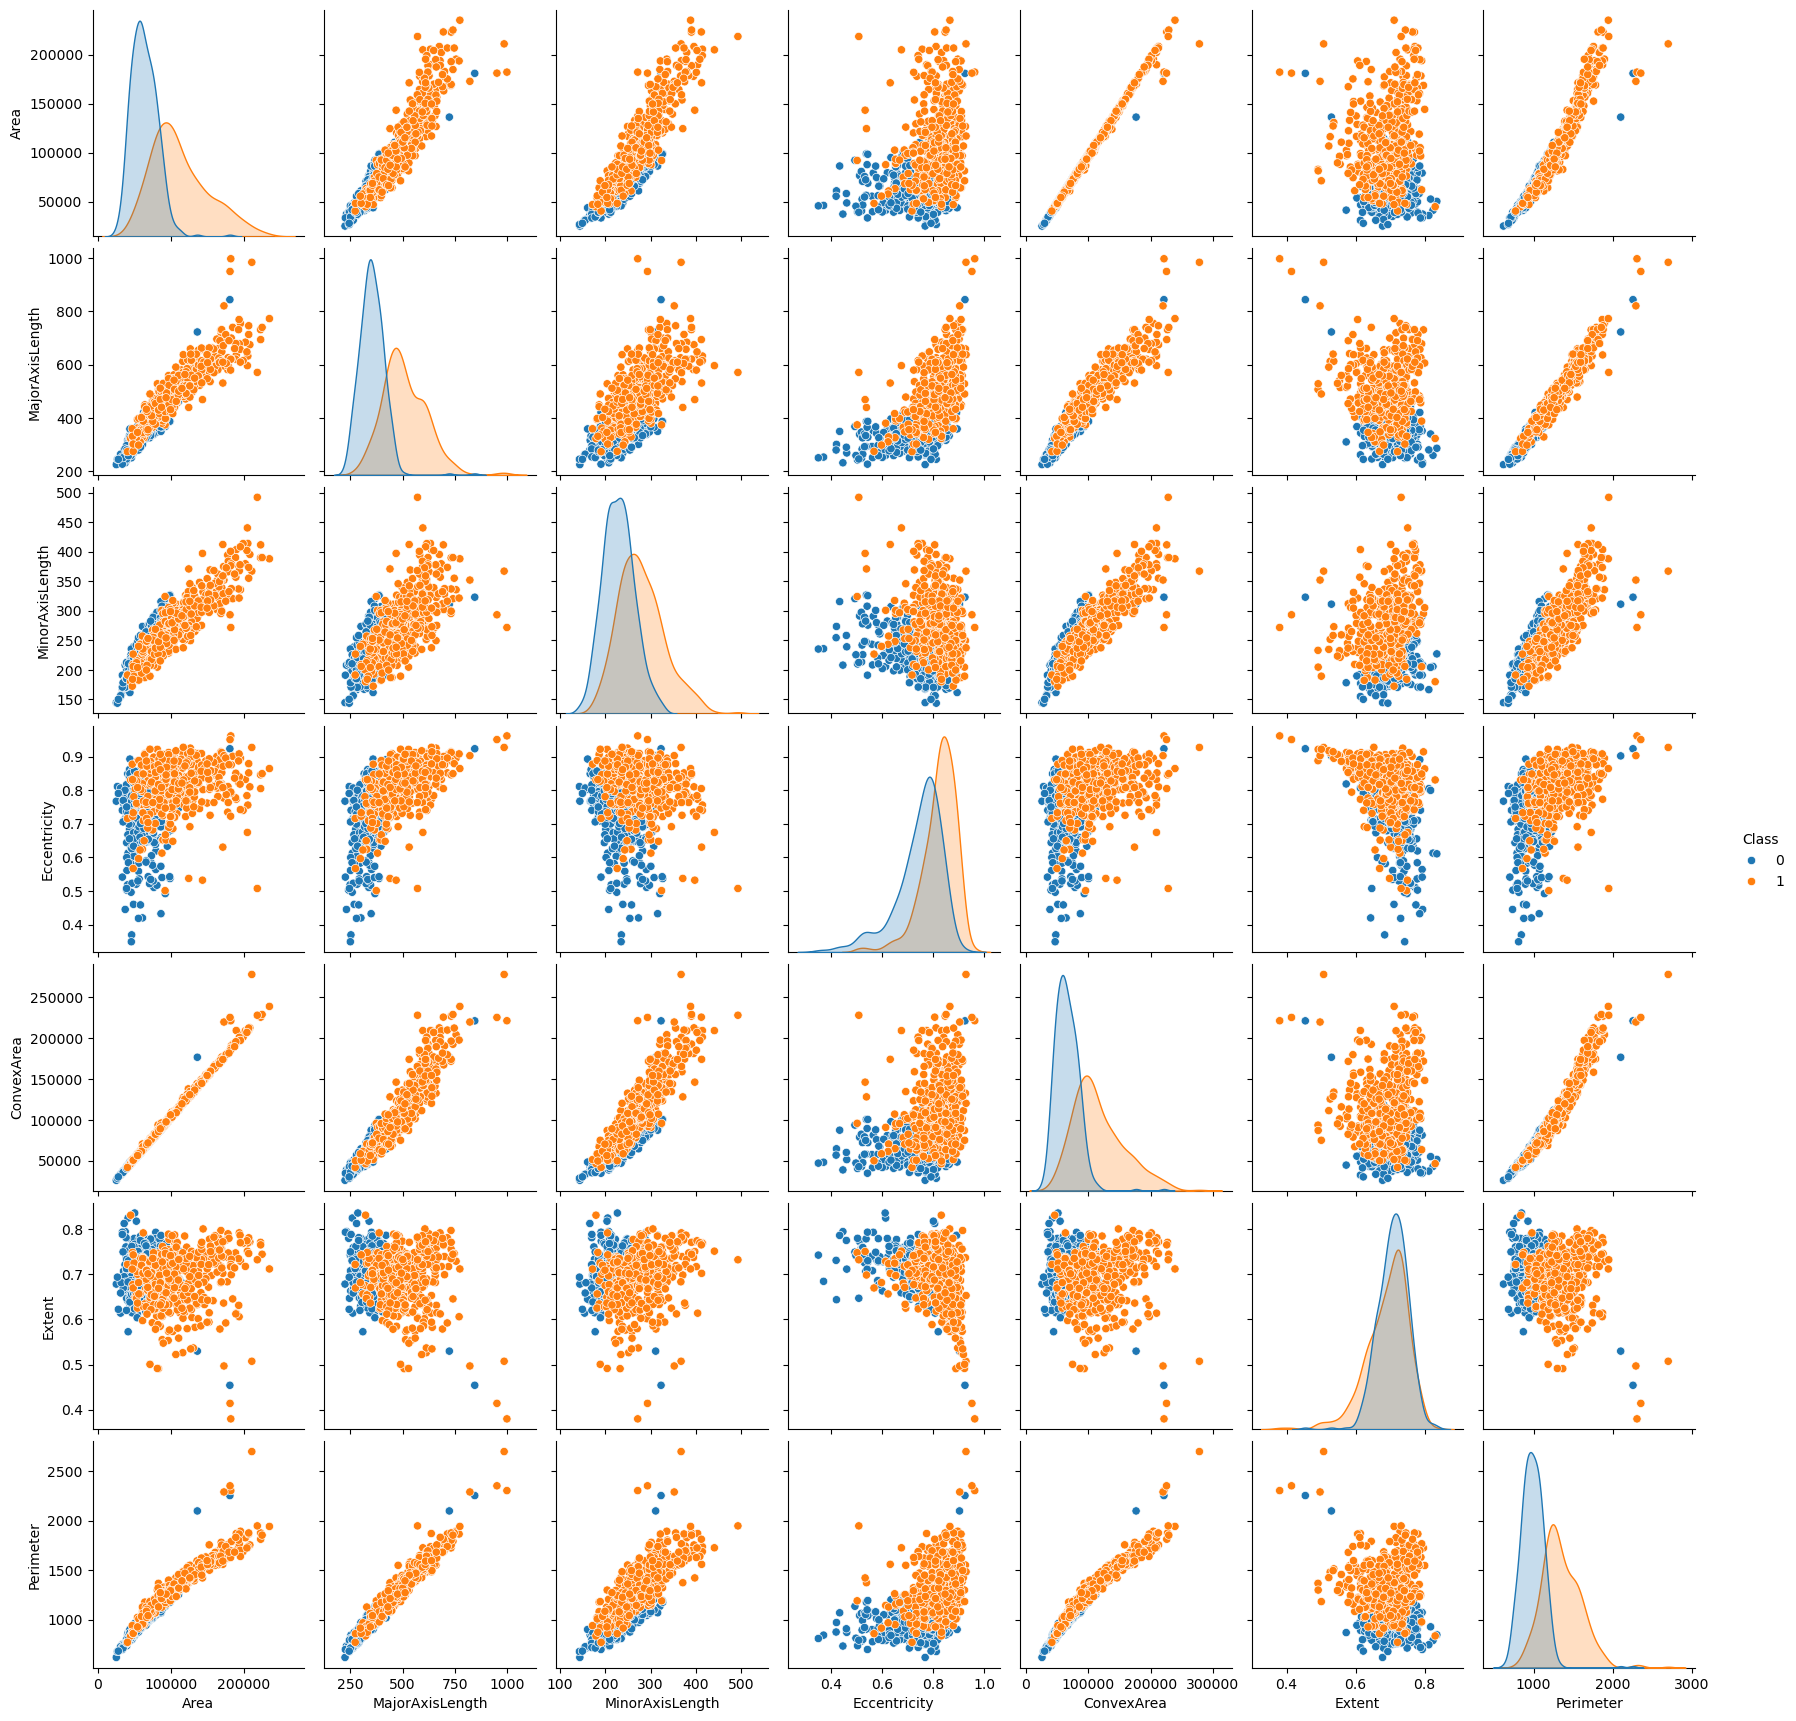

In [676]:
sns.pairplot(df, hue = "Class");


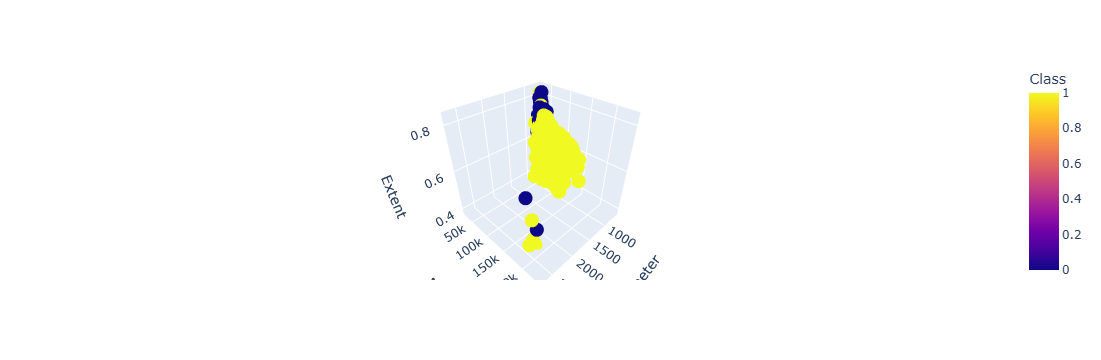

In [869]:
fig = px.scatter_3d(df, x='Perimeter', y='Area', z='Extent', color='Class')
fig.show()


# <font color='#FF7F50'> <b>Logistic Regression Model</b><font color='black'>

## <font color='#FF7F57'> <b>Train | Test Split and Scaling</b><font color='black'>

In [680]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [681]:
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [682]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=10)


## <font color='#FF7F50'> <b>Logistic Regression with Pipeline</b><font color='black'>

In [684]:
scaler = StandardScaler()

In [685]:
log_model = LogisticRegression()

In [686]:
log_pipe = Pipeline([("scaler",scaler),("log_model",log_model)]) 

In [687]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [688]:
y_pred = log_pipe.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0], dtype=int64)

In [689]:
y_pred_proba = log_pipe.predict_proba(X_test)
y_pred_proba

array([[9.09367255e-01, 9.06327451e-02],
       [2.14599223e-01, 7.85400777e-01],
       [8.61103592e-01, 1.38896408e-01],
       [9.75009573e-01, 2.49904275e-02],
       [7.18160107e-01, 2.81839893e-01],
       [9.78185662e-01, 2.18143381e-02],
       [9.67187299e-01, 3.28127007e-02],
       [2.70086392e-01, 7.29913608e-01],
       [6.24076978e-01, 3.75923022e-01],
       [8.27866929e-01, 1.72133071e-01],
       [5.49868082e-01, 4.50131918e-01],
       [6.47708012e-01, 3.52291988e-01],
       [1.34987813e-03, 9.98650122e-01],
       [7.43961303e-03, 9.92560387e-01],
       [2.25820900e-04, 9.99774179e-01],
       [4.10643886e-03, 9.95893561e-01],
       [1.04705542e-04, 9.99895294e-01],
       [2.05622290e-01, 7.94377710e-01],
       [8.80606011e-01, 1.19393989e-01],
       [7.27264248e-01, 2.72735752e-01],
       [9.53990280e-01, 4.60097205e-02],
       [6.10318650e-04, 9.99389681e-01],
       [7.48905682e-01, 2.51094318e-01],
       [9.87054802e-01, 1.29451977e-02],
       [2.818758

## <font color='#FF7F50'> <b>X_test + y_yest + y_pred + y_pred_proba</b><font color='black'>

In [691]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
375,65999,326.298721,264.414877,0.585952,67971,0.676864,998.793,0
793,76708,458.044640,216.340932,0.881430,78694,0.658393,1135.680,1
360,48809,332.264893,190.351365,0.819632,51847,0.661342,928.016,0
77,42637,293.429580,189.432158,0.763693,44052,0.725119,814.182,0
686,61539,364.255945,220.362020,0.796252,65462,0.723392,1056.491,1
...,...,...,...,...,...,...,...,...
73,68520,373.235638,237.041523,0.772431,70759,0.712859,1049.093,0
62,78571,443.822291,228.757615,0.856934,81718,0.642193,1157.330,0
292,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221,0
508,133101,641.509739,265.313970,0.910469,136793,0.582496,1544.712,1


In [692]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba
375,65999,326.298721,264.414877,0.585952,67971,0.676864,998.793,0,0.090633
793,76708,458.044640,216.340932,0.881430,78694,0.658393,1135.680,1,0.785401
360,48809,332.264893,190.351365,0.819632,51847,0.661342,928.016,0,0.138896
77,42637,293.429580,189.432158,0.763693,44052,0.725119,814.182,0,0.024990
686,61539,364.255945,220.362020,0.796252,65462,0.723392,1056.491,1,0.281840
...,...,...,...,...,...,...,...,...,...
73,68520,373.235638,237.041523,0.772431,70759,0.712859,1049.093,0,0.241827
62,78571,443.822291,228.757615,0.856934,81718,0.642193,1157.330,0,0.777038
292,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221,0,0.169443
508,133101,641.509739,265.313970,0.910469,136793,0.582496,1544.712,1,0.999515


In [693]:
test_data["pred"] = y_pred
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
375,65999,326.298721,264.414877,0.585952,67971,0.676864,998.793,0,0.090633,0
793,76708,458.044640,216.340932,0.881430,78694,0.658393,1135.680,1,0.785401,1
360,48809,332.264893,190.351365,0.819632,51847,0.661342,928.016,0,0.138896,0
77,42637,293.429580,189.432158,0.763693,44052,0.725119,814.182,0,0.024990,0
686,61539,364.255945,220.362020,0.796252,65462,0.723392,1056.491,1,0.281840,0
...,...,...,...,...,...,...,...,...,...,...
73,68520,373.235638,237.041523,0.772431,70759,0.712859,1049.093,0,0.241827,0
62,78571,443.822291,228.757615,0.856934,81718,0.642193,1157.330,0,0.777038,1
292,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221,0,0.169443,0
508,133101,641.509739,265.313970,0.910469,136793,0.582496,1544.712,1,0.999515,1


In [694]:
test_data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
559,139399,522.468010,348.282162,0.745407,144034,0.693631,1471.508,1,0.971861,1
33,61600,350.182754,225.842771,0.764243,63397,0.746830,972.472,0,0.104765,0
360,48809,332.264893,190.351365,0.819632,51847,0.661342,928.016,0,0.138896,0
179,48693,306.573907,204.280621,0.745653,50298,0.740128,848.422,0,0.030200,0
650,194864,657.867843,378.058461,0.818384,197430,0.786427,1700.937,1,0.999245,1
557,77402,469.459347,215.079951,0.888878,80680,0.621329,1162.004,1,0.870543,1
686,61539,364.255945,220.362020,0.796252,65462,0.723392,1056.491,1,0.281840,0
256,61463,369.399745,213.619620,0.815832,63117,0.786777,966.493,0,0.119394,0
429,67404,349.011262,247.690269,0.704513,69607,0.745026,997.276,0,0.100081,0
40,95245,397.094114,307.273922,0.633422,97988,0.753044,1201.390,0,0.388265,0


## <font color='#FF7F50'> <b>Model Performance</b><font color='black'>

In [698]:
accuracy_score(y_test,y_pred)

0.8722222222222222

In [699]:
log_pipe.score(X_test, y_test)


0.8722222222222222

In [700]:
precision_score(y_test, y_pred, pos_label=1)


0.8941176470588236

In [701]:
precision_score(y_test, y_pred, pos_label=0)


0.8526315789473684

In [702]:
recall_score(y_test, y_pred,  pos_label=1)

0.8444444444444444

In [703]:
recall_score(y_test, y_pred,  pos_label=0)

0.9

In [704]:
f1_score(y_test,y_pred, pos_label=1)


0.8685714285714285

In [705]:
f1_score(y_test,y_pred, pos_label=0)

0.8756756756756757

In [706]:
confusion_matrix(y_test,y_pred)


array([[81,  9],
       [14, 76]], dtype=int64)

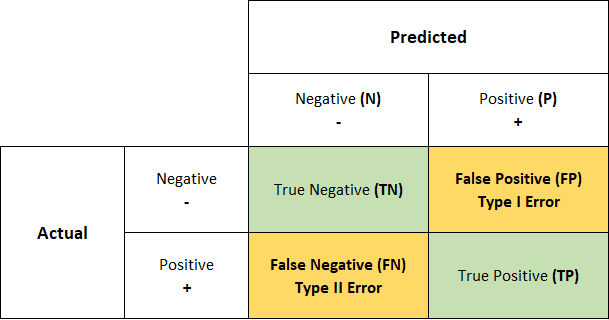

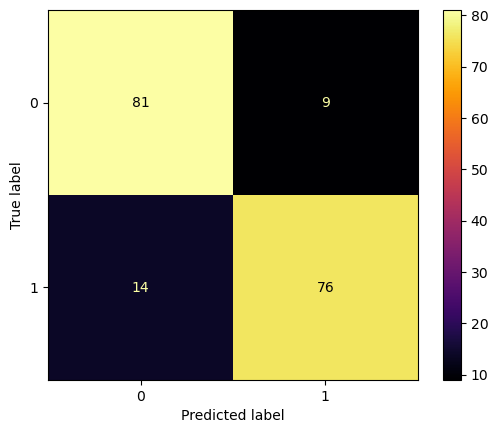

In [708]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_pipe, X_test, y_test, cmap="inferno")

# plot_confusion_matrix(log_pipe, X_test, y_test);

In [709]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    

In [710]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) 

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## <font color='#FF7F50'> <b>Cross Validate</b><font color='black'>

In [712]:
from sklearn.metrics import get_scorer_names

scorers = get_scorer_names()
print(scorers)

# from sklearn.metrics import SCORERS
# SCORERS.keys()


['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc',

In [713]:
model = Pipeline([("scaler",scaler),("log_model",log_model)])

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores



,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.008998,0.001081,0.935484,0.881789,0.805556,0.851852,0.865672,0.866562,0.875000,0.868827
2,0.010038,0.000000,0.857143,0.878981,0.833333,0.851852,0.845070,0.865204,0.847222,0.867284
3,0.006120,0.004008,0.842105,0.887097,0.888889,0.848765,0.864865,0.867508,0.861111,0.870370
4,0.007992,0.007192,0.767442,0.879365,0.916667,0.854938,0.835443,0.866980,0.819444,0.868827
5,0.008999,0.007733,0.933333,0.876972,0.777778,0.858025,0.848485,0.867395,0.861111,0.868827
6,0.007001,0.005007,0.903226,0.869159,0.777778,0.861111,0.835821,0.865116,0.847222,0.865741
7,0.003511,0.000000,0.942857,0.875399,0.916667,0.845679,0.929577,0.860283,0.930556,0.862654
8,0.005991,0.003146,0.804878,0.882166,0.916667,0.854938,0.857143,0.868339,0.847222,0.870370
9,0.011702,0.004006,0.857143,0.871069,0.833333,0.854938,0.845070,0.862928,0.847222,0.864198
10,0.008146,0.004008,0.967742,0.875796,0.833333,0.848765,0.895522,0.862069,0.902778,0.864198


In [714]:
df_scores.mean()[2:]  

test_precision     0.881135
train_precision    0.877779
test_recall        0.850000
train_recall       0.853086
test_f1            0.862267
train_f1           0.865238
test_accuracy      0.863889
train_accuracy     0.867130
dtype: float64

In [715]:

eval_metric(log_pipe, X_train, y_train, X_test, y_test) 


Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## <font color='#FF7F50'> <b>GridSearchCV</b><font color='black'>

In [717]:
log_pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('log_model', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'log_model': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log_model__C': 1.0,
 'log_model__class_weight': None,
 'log_model__dual': False,
 'log_model__fit_intercept': True,
 'log_model__intercept_scaling': 1,
 'log_model__l1_ratio': None,
 'log_model__max_iter': 100,
 'log_model__multi_class': 'auto',
 'log_model__n_jobs': None,
 'log_model__penalty': 'l2',
 'log_model__random_state': None,
 'log_model__solver': 'lbfgs',
 'log_model__tol': 0.0001,
 'log_model__verbose': 0,
 'log_model__warm_start': False}

Logistic Regression Hyperparametreleri : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [719]:
from sklearn.model_selection import GridSearchCV

In [762]:
# pipeline for logistic regression

model = Pipeline([("scaler", scaler), ("log_model", log_model)])

# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"]


C = np.logspace(-1, 5, 20)


class_weight = ["balanced", None]



solver = ["lbfgs", "liblinear", "sag", "saga"]


param_grid = {
    "log_model__penalty": penalty,
    "log_model__C": [C, 1],  
    "log_model__class_weight": class_weight,
    "log_model__solver": solver
}


grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',    
    n_jobs=-1)  


In [763]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_model__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                          1],
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             scoring='accuracy')

In [764]:
grid_model.best_params_

{'log_model__C': 1,
 'log_model__class_weight': 'balanced',
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [765]:
grid_model.best_index_

17

In [766]:
grid_model.best_score_

0.8652777777777778

In [767]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)  

Test_Set
[[79 11]
 [10 80]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        90
           1       0.88      0.89      0.88        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[316  44]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.87      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## <font color='#FF7F50'> <b>Precision-Recall Curve & ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b><font color='black'>

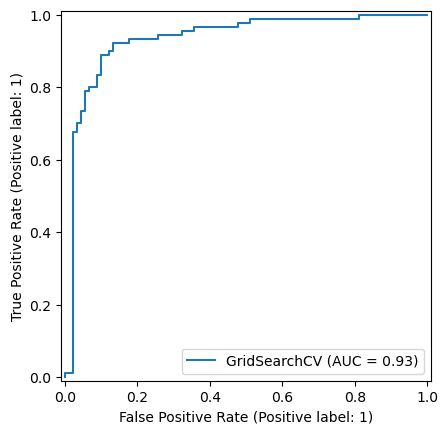

In [769]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(grid_model, X_test, y_test)


# plot_roc_curve(grid_model, X_test, y_test); 

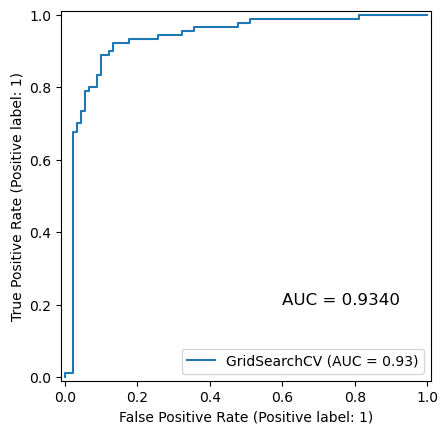

In [770]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

plt.text(0.6, 0.2, f'AUC = {auc:.4f}', fontsize=12)
plt.show()

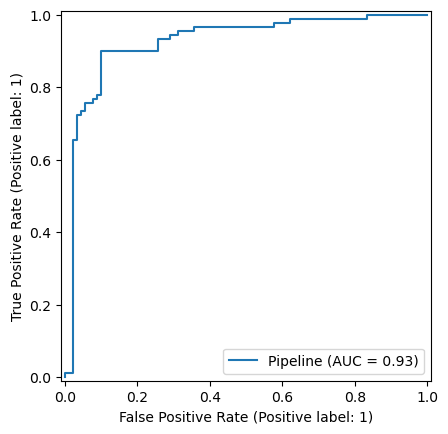

In [771]:
RocCurveDisplay.from_estimator(log_pipe, X_test, y_test);

# plot_roc_curve(log_pipe, X_test, y_test); 

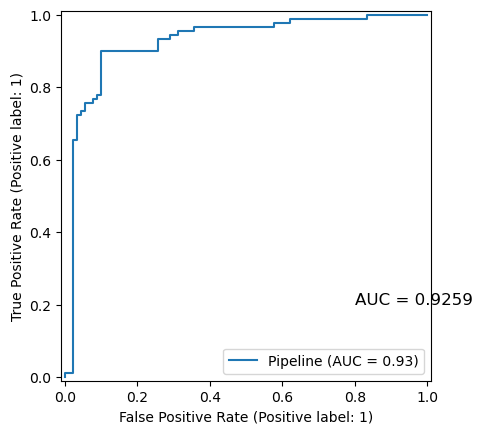

In [772]:
y_pred_proba = log_pipe.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

RocCurveDisplay.from_estimator(log_pipe, X_test, y_test)

plt.text(0.8, 0.2, f'AUC = {auc:.4f}', fontsize=12)
plt.show()

In [773]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, log_pipe.predict_proba(X_test)[:, 1])

print("Precision:", precision)
print("Recall:", recall)
print("Thresholds:", thresholds)

Precision: [0.5        0.5027933  0.50561798 0.50847458 0.51136364 0.51428571
 0.51724138 0.52023121 0.52325581 0.52631579 0.52941176 0.53254438
 0.53571429 0.53892216 0.54216867 0.54545455 0.54268293 0.54601227
 0.54938272 0.55279503 0.55625    0.55974843 0.56329114 0.56687898
 0.57051282 0.57419355 0.57792208 0.58169935 0.58552632 0.58940397
 0.59333333 0.59731544 0.60135135 0.60544218 0.60958904 0.6137931
 0.61111111 0.61538462 0.61971831 0.62411348 0.62857143 0.62589928
 0.63043478 0.6350365  0.63970588 0.64444444 0.64925373 0.65413534
 0.65909091 0.66412214 0.66923077 0.6744186  0.6796875  0.68503937
 0.69047619 0.696      0.7016129  0.70731707 0.71311475 0.71900826
 0.725      0.73109244 0.72881356 0.73504274 0.74137931 0.74782609
 0.75438596 0.75221239 0.75892857 0.76576577 0.76363636 0.7706422
 0.77777778 0.78504673 0.78301887 0.78095238 0.77884615 0.78640777
 0.79411765 0.8019802  0.81       0.81818182 0.82653061 0.83505155
 0.84375    0.85263158 0.86170213 0.87096774 0.880434

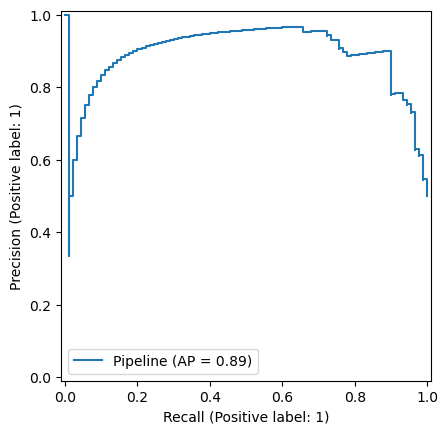

In [774]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(log_pipe, X_test, y_test)

# plot_precision_recall_curve(log_pipe, X_test, y_test);

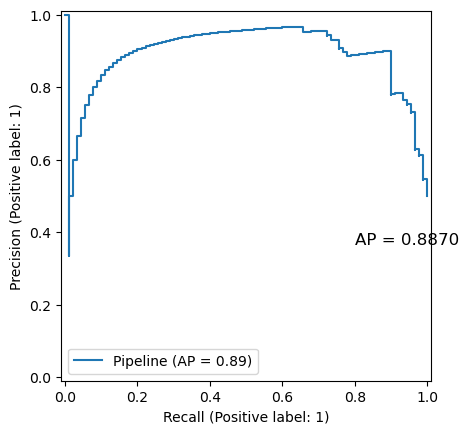

In [775]:
y_pred_proba = log_pipe.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_pred_proba)

PrecisionRecallDisplay.from_estimator(log_pipe, X_test, y_test)

plt.text(0.8, 0.4, f'AP = {average_precision:.4f}', fontsize=12, va='top', ha='left')
plt.show()

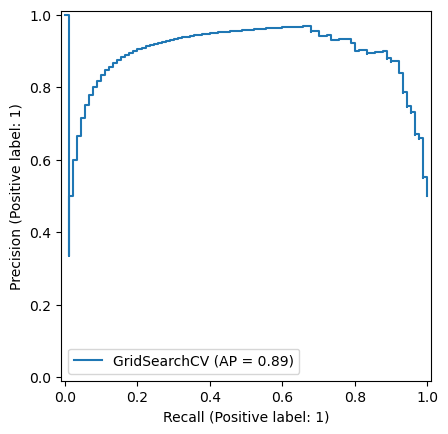

In [776]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

# plot_precision_recall_curve(grid_model, X_test, y_test);

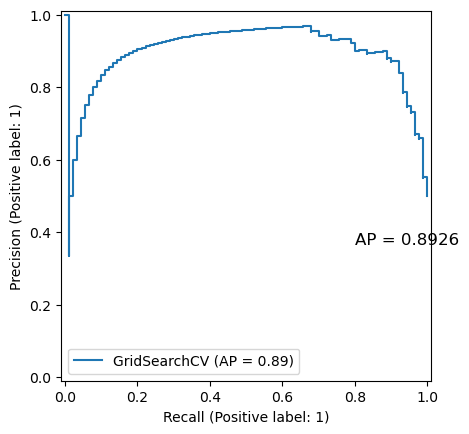

In [777]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_pred_proba)

PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test)

plt.text(0.8, 0.4, f'AP = {average_precision:.4f}', fontsize=12, va='top', ha='left')
plt.show()

# <font color='#FF7F50'> <b>KNN</b><font color='black'>

In [779]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=10)

In [780]:
from sklearn.neighbors import KNeighborsClassifier
operations = [("scaler",StandardScaler()),("knn",KNeighborsClassifier(n_neighbors=5))]

In [781]:
pipe_model = Pipeline(steps=operations)

In [782]:
param_grid = [
    {
        "knn__n_neighbors": range(1, 30),
        "knn__metric": ['euclidean', 'manhattan'],
        "knn__weights": ['uniform', 'distance']
    },
    {
        "knn__n_neighbors": range(1, 30),
        "knn__metric": ['minkowski'],
        "knn__p": [1, 2],
        "knn__weights": ['uniform', 'distance']
    }
]

In [783]:
knn_grid_model = GridSearchCV(pipe_model, param_grid, cv=5, scoring= "accuracy", return_train_score=True)

In [784]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__metric': ['euclidean', 'manhattan'],
                          'knn__n_neighbors': range(1, 30),
                          'knn__weights': ['uniform', 'distance']},
                         {'knn__metric': ['minkowski'],
                          'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                          'knn__weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [785]:
knn_grid_model.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 23, 'knn__weights': 'uniform'}

In [786]:
operations = [("scaler",StandardScaler()),("knn",KNeighborsClassifier(n_neighbors=7,metric='euclidean'))]
knn_pipe_model = Pipeline(steps=operations)

In [787]:
knn_pipe_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=7))])

In [788]:
eval_metric(knn_pipe_model,X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [18 72]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        90
           1       0.89      0.80      0.84        90

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180


Train_Set
[[333  27]
 [ 58 302]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       360
           1       0.92      0.84      0.88       360

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720



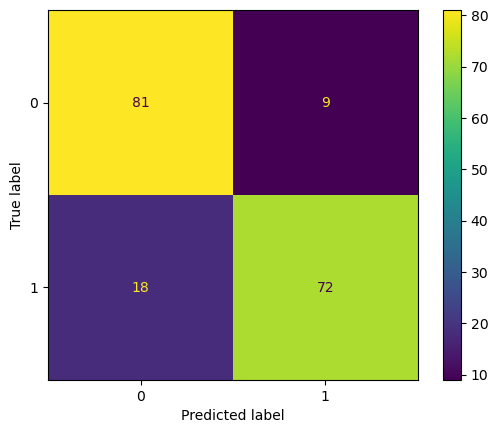

In [789]:
ConfusionMatrixDisplay.from_estimator(knn_pipe_model, X_test, y_test);

# <font color='#FF7F50'> <b>SVM</b><font color='black'>

In [791]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, PrecisionRecallDisplay, average_precision_score

In [792]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=10)

In [793]:
param_grid = {
    'SVC__C': [0.001, 0.01, 0.1, 1, 10],
    'SVC__gamma': ["scale", "auto", 0.1, 0.2, 0.5], 
    'SVC__kernel': ['rbf', 'linear', 'poly'],  
    'SVC__class_weight': ["balanced", None]
}


In [794]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)
svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="accuracy",
                              cv=5,
                              return_train_score=True,
                              n_jobs=1).fit(X_train, y_train)

In [795]:
svm_model_grid.best_params_

{'SVC__C': 1,
 'SVC__class_weight': 'balanced',
 'SVC__gamma': 0.1,
 'SVC__kernel': 'rbf'}

In [796]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(probability=True))]),
             n_jobs=1,
             param_grid={'SVC__C': [0.001, 0.01, 0.1, 1, 10],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 'auto', 0.1, 0.2, 0.5],
                         'SVC__kernel': ['rbf', 'linear', 'poly']},
             return_train_score=True, scoring='accuracy')

In [797]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [15 75]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        90
           1       0.89      0.83      0.86        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[328  32]
 [ 60 300]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       360
           1       0.90      0.83      0.87       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



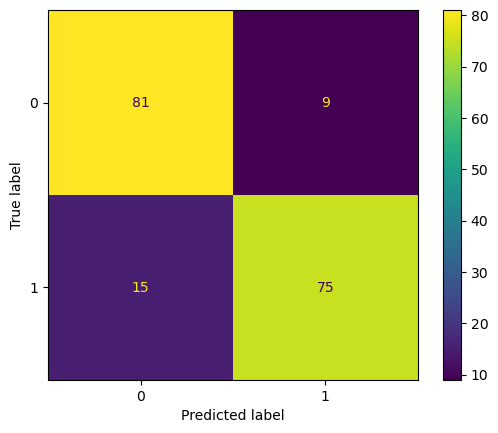

In [798]:
ConfusionMatrixDisplay.from_estimator(svm_model_grid, X_test, y_test);

# <font color='#FF7F50'> <b>Prediction</b><font color='black'>

In [800]:
new_data = pd.read_excel("Raisin_Dataset_new.xlsx") 

In [801]:
final_scaler = StandardScaler()
final_model = LogisticRegression()

In [802]:
final_pipe = Pipeline([("scaler", final_scaler), ("log_model", final_model)])

In [803]:
final_pipe.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [804]:
predictions = final_pipe.predict(new_data)


In [805]:
positive_class_proba = final_pipe.predict_proba(new_data)[:, 1]


In [806]:
results = pd.DataFrame({
    'Tahmin': predictions,
    'Pozitif Sınıf Olasılığı': positive_class_proba
})

results


,Tahmin,Pozitif Sınıf Olasılığı
0,1,0.651535
1,0,0.132157
2,0,0.086232
3,0,0.024595
4,0,0.123529
5,1,0.572597
6,1,0.744069
7,1,0.729349
8,1,0.864033
9,1,0.938272


<p style=" background-color:#FF7F50;font-family:newtimeroman;font-size:200%;color:#fff5ee;text-align:center;border-radius:20px 20px;"><span  style = "padding : 30px; display : block; "><b>THANK YOU!</b></span></p>